In [ ]:
import numpy as np, random
def set_seed(seed):
  np.random.seed(seed)
  random.seed(seed)
set_seed(810109203)

#loading test dataset

In [ ]:
from keras.datasets import mnist
(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] , -1)
test_images = test_images.astype('float32') / 255.0

#loading pre_trained autoencoder

In [ ]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

313/313 [==============================] - 2s 5ms/step


#showing 4 pictures with their new pictures

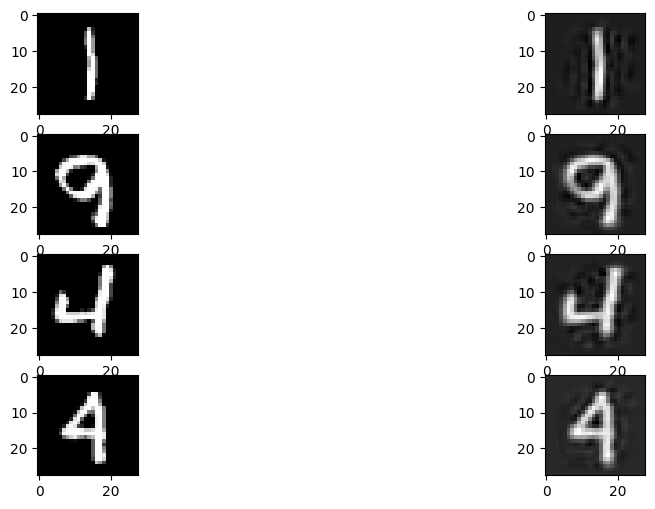

In [ ]:
import matplotlib.pyplot as plt
img_1 = test_images[154].reshape((28, 28))
new_img_1 = reconstructed_images[154].reshape((28, 28))
img_2 = test_images[274].reshape((28, 28))
new_img_2 = reconstructed_images[274].reshape((28, 28))
img_3 = test_images[399].reshape((28, 28))
new_img_3 = reconstructed_images[399].reshape((28, 28))
img_4 = test_images[712].reshape((28, 28))
new_img_4 = reconstructed_images[712].reshape((28, 28))

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 6))

axes[0, 0].imshow(img_1, cmap='gray', interpolation='nearest')
axes[0, 1].imshow(new_img_1, cmap='gray', interpolation='nearest')
axes[1, 0].imshow(img_2, cmap='gray', interpolation='nearest')
axes[1, 1].imshow(new_img_2, cmap='gray', interpolation='nearest')
axes[2, 0].imshow(img_3, cmap='gray', interpolation='nearest')
axes[2, 1].imshow(new_img_3, cmap='gray', interpolation='nearest')
axes[3, 0].imshow(img_4, cmap='gray', interpolation='nearest')
axes[3, 1].imshow(new_img_4, cmap='gray', interpolation='nearest')


plt.show()

#funcion for calculating MSE

In [ ]:
def MSE_calculator(new_array, old_array):
  difference_array = new_array - old_array
  difference_array = np.square(difference_array)

  MSE = np.sum(difference_array) / len(test_images)
  return MSE

#calculationg all MSEs

In [ ]:
list_of_MSEs = []
for i in range(len(test_images)):
  temp_MSE = MSE_calculator(reconstructed_images[i], test_images[i])
  list_of_MSEs.append(temp_MSE)

#showing their histogram

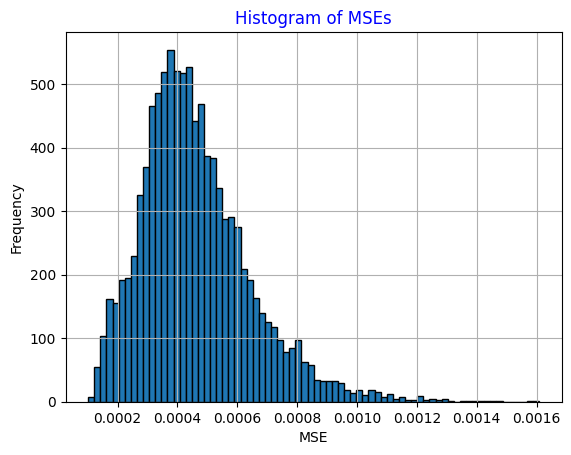

In [ ]:
plt.hist(list_of_MSEs, bins='auto', edgecolor='black')
plt.title('Histogram of MSEs', color='b')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#calculating mean and variance

In [ ]:
import math
sum_of_MSEs = 0
for item in list_of_MSEs:
  sum_of_MSEs += item
sample_mean = sum_of_MSEs / len(list_of_MSEs)

sum_of_sqr_diffs = 0
for item in list_of_MSEs:
  temp = (item - sample_mean) ** 2
  sum_of_sqr_diffs += temp
sample_variance = sum_of_sqr_diffs / len(list_of_MSEs)
sample_sd = math.sqrt(sample_variance)

#doing goodness of fit test

In [ ]:
from scipy import stats
ks_statistic, p_value = stats.kstest(list_of_MSEs, cdf='norm', args=(sample_mean, sample_sd))

print("p_value = ", p_value)

p_value =  4.5381852339995085e-43


In [ ]:
floating_point_number = 4.5381852339995085e-43

# Convert to integer
integer_value = int(floating_point_number)

print("Floating-point number:", floating_point_number)
print("Integer value:", integer_value)

Floating-point number: 4.5381852339995085e-43
Integer value: 0
